### 3. Lineární algebra

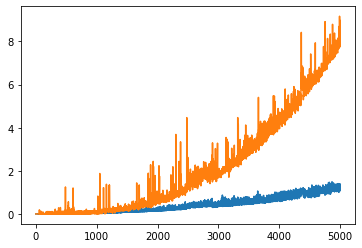

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from time import process_time


def vytvor_ctvercovou_matici(n):
    matice = np.array([[random.randint(1, 1000) for i in range(n)] for j in range(n)])
    matice[np.diag_indices_from(matice)] = 10000
    return matice

def vytvor_vektor(n):
    return np.array([random.randint(-20, 20) for i in range(n)])

def gaussova_prima_metoda(matice, vektor):
    return list(np.linalg.solve(matice, vektor))

def jacobiho_iteracni_metoda(matice, vektor, opakovani=5, x=None):
    if not x:
        x = np.ones(len(matice))
    D = np.diag(matice)
    L = np.tril(matice, k = -1)
    U = np.triu(matice, k = 1 )
    for i in range(opakovani):
        x = (vektor - np.matmul((L + U),x))/D
    return list(x)

i_time = []
p_time = []
velikost = []

for i in range(1,5000):
    matice = vytvor_ctvercovou_matici(i)
    vektor = vytvor_vektor(i)
    velikost.append(i)

    #iteracni
    i_start = process_time()
    jacobiho_iteracni_metoda(matice, vektor)
    i_konec = process_time()

    #prima
    p_start = process_time()
    gaussova_prima_metoda(matice, vektor)
    p_konec = process_time()

    p_time.append(p_konec - p_start)
    i_time.append(i_konec - i_start)

plt.plot(velikost, i_time)
plt.plot(velikost, p_time)
plt.show()